Average number of goals for the home team: 1.745755783196268
Average number of goals for the away team: 1.187587168758717


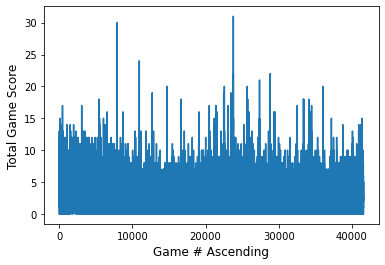

Home Team Home Win is (exluding neutral venues): 50.49 %
Country with the highest number of goals in any FIFA games is: Germany
The country with the most game wins in the last 5 years and most likely to win the next FIFA event is: Belgium
The difference between the home and away teams average goals IS statistically significant


In [4]:
from scipy.stats import ttest_ind
from scipy.stats import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("downloads/results.csv")

#1
print("Average number of goals for the home team:", df["home_score"].mean())

#2
print("Average number of goals for the away team:", df["away_score"].mean())

#3
df['Total_Game_Score'] = df['home_score'] + df['away_score']
df

ax = df['Total_Game_Score'].plot()
ax.set_xlabel('Game # Ascending', fontsize=12)
ax.set_ylabel('Total Game Score', fontsize=12)
plt.show()

#4
df['Home_Win'] = df['home_score'] > df['away_score']
ndf = df[df.neutral==False]
hndf = ndf[ndf.Home_Win==True]
hmwin = float(len(hndf.index) / len(ndf.index) * 100)
print('Home Team Home Win is (exluding neutral venues):', round(hmwin, 2),'%')

#5
start_date = '2010-01-01'
end_date = '2020-12-31'
after_date=df['date'] >= start_date
before_date=df['date'] <= end_date
between_dates=after_date & before_date
df2010=df.loc[between_dates]
df2010

df_fifa_10 = df2010.tournament.str.contains('FIFA')
df2010[df_fifa_10]

hgoal=df2010[df_fifa_10].groupby('home_team')['home_score'].sum()
agoal=df2010[df_fifa_10].groupby('away_team')['away_score'].sum()
tgoal=hgoal+agoal

cgoal=tgoal.iteritems()
highscore=tgoal.max()
for country,score in cgoal:
    if score == highscore:
        print('Country with the highest number of goals in any FIFA games is:', country)
        
#6
df['winner'] = pd.concat([df.home_team[df.home_score>df.away_score],
                          df.away_team[df.home_score<df.away_score]], axis=0)

startdate = '2014-01-01'
enddate = '2019-12-31'
afterdate=df['date'] >= startdate
beforedate=df['date'] <= enddate
betweendates=afterdate & beforedate
df2014=df.loc[betweendates]
df2014 

df_fifa_14 = df2014.tournament.str.contains('FIFA')
df14=df2014[df_fifa_14] 

n = 1
probwin=df14['winner'].value_counts()[:n].index.tolist()

print('The country with the most game wins in the last 5 years and most likely to win the next FIFA event is: ', *probwin, sep = '',) 

#7
stati = ('%6.3f %6.25f' % stats.ttest_ind(np.array(df['home_score']), np.array(df['away_score']), equal_var=False))
signi = stati.split()
pval = float(signi.pop(1))
if pval < 0.05:
    print('The difference between the home and away teams average goals IS statistically significant')
else:
    print('The difference between the home and away teams average goals IS NOT statistically significant')